# Q5

In [7]:
# library imports
import sys, math, os
import numpy as np
from numpy import abs, log, rot90, hstack, fft, copy, vstack, ones, zeros
from numpy.fft import fftshift, fft2
from skimage import io, util, color, data, filters, img_as_ubyte, transform, img_as_float, exposure
from skimage.color import rgb2lab, rgb2hsv, hsv2rgb, lab2rgb, rgb2gray
from skimage.io import imread, imshow
import matplotlib.pyplot as plt
from scipy.ndimage import filters, sobel
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.feature import canny
from skimage.draw import circle_perimeter
from skimage.util import img_as_ubyte
from collections import defaultdict
from scipy import misc

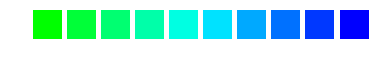

In [33]:
# 3-channel 100 × 100 HSI image with values of S and I to be 255
def colorize(hsv, hue):
    hsv[:, :, 0] = hue
    hsv[:, :, 1] = 1
    return color.hsv2rgb(hsv)

gen_im = ones((100,100,3))
hue_rotations = np.linspace(0.33333333, 0.66666667, 10)
colorful_images = [colorize(gen_im, hue) for hue in hue_rotations]


fig, axes = plt.subplots(nrows=1, ncols=10)
for ax, array in zip(axes.flat, colorful_images):
    ax.imshow(array, vmin=0, vmax=1)
    ax.set_axis_off()
plt.show()

### Part 1

Change in hue with uniform increase in step-size:  

Some transitions are more drastic than other transitions perceptually. For example, 1, 2 and 3 look almost the same, whereas, 5, 6 and 7 appear as distinctly different colours, despite being equidistant with respect to this colour space.

### Part 2: Perceptually Uniform Transition

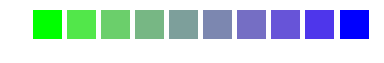

In [48]:
# CIE L*a*b Colour space
def colorize_lab(lab, l, a, b):
    lab[:, :, 0] = l
    lab[:, :, 1] = a
    lab[:, :, 2] = b
    return lab2rgb(lab)

gen_im = ones((100,100,3))
L = np.linspace(87.73509949, 32.29567257, 10)
A = np.linspace(-86.18302974, 79.18559091, 10)
B = np.linspace(83.17970318, -107.85730021, 10)
colorful_images = [colorize_lab(gen_im, v1, v2, v3) for (v1, v2, v3) in zip(L, A, B)]

fig, axes = plt.subplots(nrows=1, ncols=10)
for ax, array in zip(axes.flat, colorful_images):
    ax.imshow(array, vmin=0, vmax=1)
    ax.set_axis_off()
plt.show()